In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.impute import KNNImputer
import missingno as msno
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning)




Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Data Understanding

In [2]:
hitters = pd.read_csv("hitters.csv")

In [3]:
df = hitters.copy()

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [6]:
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [7]:
df[df["Hits"] < 70]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
6,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.0,A
11,202,53,4,31,26,27,9,1876,467,15,192,186,161,N,W,304,45,11,512.5,N
13,239,60,0,30,11,22,6,1941,510,4,309,103,207,A,E,121,151,6,700.0,A
14,196,43,7,29,27,30,13,3231,825,36,376,290,238,N,E,80,45,8,240.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,200,51,2,14,29,25,23,9778,2732,379,1272,1652,925,N,W,398,29,7,NaN,N
304,172,42,3,17,14,15,10,4086,1150,57,579,363,406,N,W,65,0,0,900.0,N
306,127,32,4,14,25,12,19,8396,2402,242,1048,1348,819,N,W,167,18,6,500.0,N
307,279,69,4,35,31,32,4,1359,355,31,180,148,158,N,E,133,173,9,277.5,N


In [8]:
df[df["Hits"] > 70]

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [9]:
df[df["Salary"].isnull()].head(10)

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
15,183,39,3,20,15,11,3,201,42,3,20,16,11,A,W,118,0,0,NaN,A
18,407,104,6,57,43,65,12,5233,1478,100,643,658,653,A,W,912,88,9,NaN,A
22,22,10,1,4,2,1,6,84,26,2,9,9,3,A,W,812,84,11,NaN,A
30,313,84,9,42,30,39,17,6890,1833,224,1033,864,1087,A,W,127,221,7,NaN,A
32,517,141,27,70,87,52,9,3571,994,215,545,652,337,N,W,1378,102,8,NaN,N
36,161,36,0,19,10,17,4,1053,244,3,156,86,107,A,E,70,149,12,NaN,A
38,346,98,5,31,53,30,16,5913,1615,235,784,901,560,A,E,0,0,0,NaN,A
39,241,61,1,34,12,14,1,241,61,1,34,12,14,N,W,166,172,10,NaN,N
41,216,54,0,21,18,15,18,7318,1926,46,796,627,483,N,W,103,84,5,NaN,N


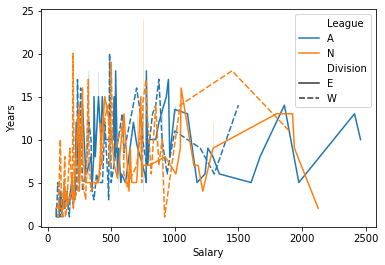

In [10]:
sns.lineplot(x = "Salary",y = "Years",data= df,hue = "League",style = "Division")

In [11]:
df.describe([0.01,0.25,0.75,0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
AtBat,322.0,380.928571,153.404981,16.0,20.42,255.25,379.5,512.00,658.59000,687.0
Hits,322.0,101.024845,46.454741,1.0,4.42,64.00,96.0,137.00,210.79000,238.0
HmRun,322.0,10.770186,8.709037,0.0,0.00,4.00,8.0,16.00,33.00000,40.0
Runs,322.0,50.909938,26.024095,0.0,1.21,30.25,48.0,69.00,107.79000,130.0
RBI,322.0,48.027950,26.166895,0.0,2.00,28.00,44.0,64.75,112.37000,121.0
Walks,322.0,38.742236,21.639327,0.0,1.00,22.00,35.0,53.00,93.58000,105.0
Years,322.0,7.444099,4.926087,1.0,1.00,4.00,6.0,11.00,19.79000,24.0
CAtBat,322.0,2648.683230,2324.205870,19.0,41.00,816.75,1928.0,3924.25,8749.97000,14053.0
CHits,322.0,717.571429,654.472627,4.0,9.84,209.00,508.0,1059.25,2500.34000,4256.0
CHmRun,322.0,69.490683,86.266061,0.0,0.00,14.00,37.5,90.00,373.12000,548.0


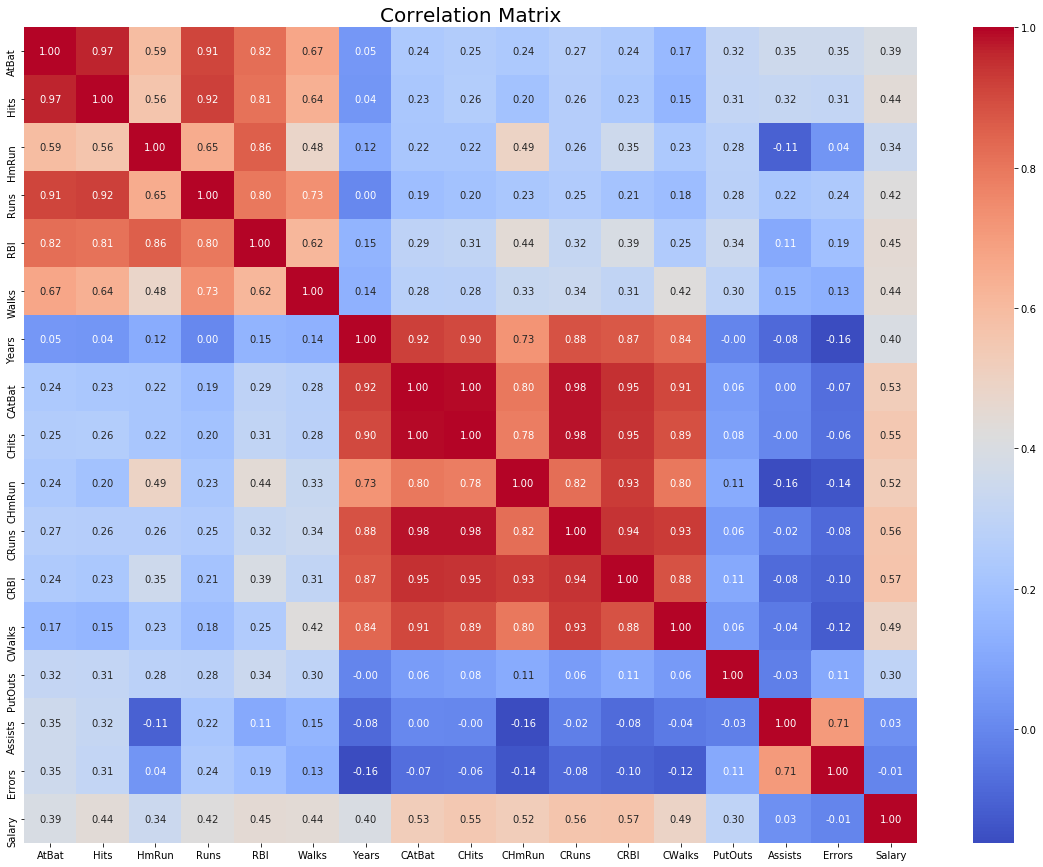

In [12]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "coolwarm" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

In [13]:
df.groupby(["League"])["Salary"].mean()

League
A    541.999547
N    529.117500
Name: Salary, dtype: float64

In [14]:
df["Salary"].mean()

535.9258821292775

## Data Preparation

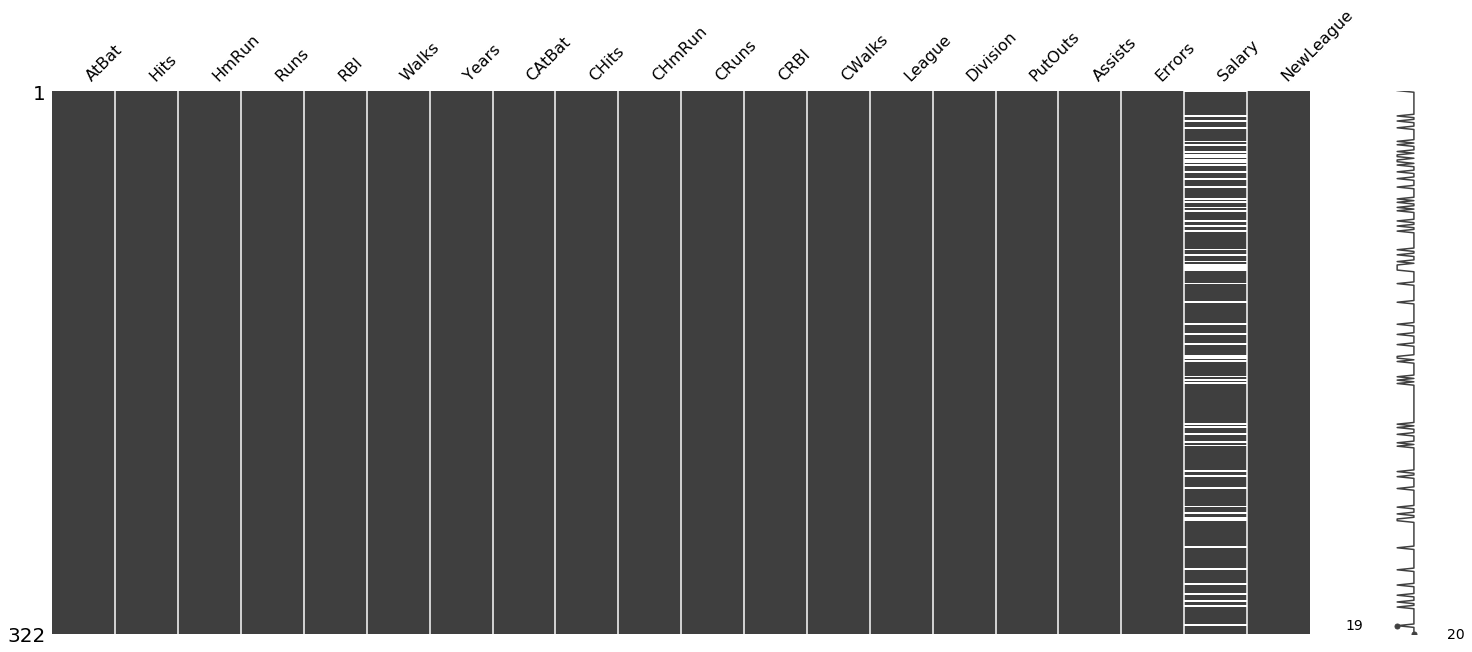

In [15]:
msno.matrix(df);

In [16]:
for i in ["Hits","HmRun","Runs","RBI","Walks","Years","CAtBat","CHits","CHmRun","CRuns","CRBI","CWalks","PutOuts","Assists","Errors","Salary","AtBat"]:

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR

    if df[(df[i] > upper) | (df[i] < lower)].any(axis=None):
        print(i,"yes")
        print(df[(df[i] > upper) | (df[i] < lower)].shape[0])
    else:
        print(i, "no")


Hits no
HmRun yes
2
Runs yes
1
RBI yes
1
Walks yes
1
Years yes
2
CAtBat yes
5
CHits yes
6
CHmRun yes
32
CRuns yes
5
CRBI yes
26
CWalks yes
20
PutOuts yes
36
Assists yes
23
Errors yes
9
Salary yes
11
AtBat no


### One hot encoding with pd lib

In [17]:
df = pd.get_dummies(df, columns =["League","Division","NewLeague"], drop_first = True)

In [18]:
cols = df.columns

### Missing values

In [19]:
imputer = KNNImputer(n_neighbors=6)
df_filled = imputer.fit_transform(df)

### Outliers 

In [20]:
from sklearn.neighbors import LocalOutlierFactor

In [21]:
clf =LocalOutlierFactor(n_neighbors= 20,contamination= 0.1)

In [22]:
clf.fit_predict(df_filled)

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1

In [23]:
df_scores = clf.negative_outlier_factor_

In [24]:
np.sort(df_scores)[0:30]

array([-6.36464578, -4.71866687, -3.0504234 , -2.52862798, -2.45790849,
       -2.11619086, -2.0456981 , -2.03521022, -1.88782002, -1.87560581,
       -1.84710862, -1.81333143, -1.80183201, -1.79947693, -1.76484292,
       -1.61038828, -1.60640604, -1.49890144, -1.49762126, -1.45008742,
       -1.44989115, -1.44529083, -1.42500219, -1.4238651 , -1.39897827,
       -1.39722172, -1.38284736, -1.37124872, -1.36376359, -1.35575347])

In [25]:
th = np.sort(df_scores)[8]
th

-1.887820021726575

In [26]:
outlier = df_scores > th

In [27]:
dff = df_filled[df_scores > th]

In [28]:
dff = pd.DataFrame(dff,columns = cols)

# PREDICTION

## Linear Regression

In [29]:

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
scaler = StandardScaler()
y = dff["Salary"]
X = dff.drop('Salary', axis=1)


In [30]:
df_ = pd.DataFrame(dff, columns = cols)

In [31]:
dff.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_N,Division_W,NewLeague_N
0,293.0,66.0,1.0,30.0,29.0,14.0,1.0,293.0,66.0,1.0,30.0,29.0,14.0,446.0,33.0,20.0,82.916667,0.0,0.0,0.0
1,315.0,81.0,7.0,24.0,38.0,39.0,14.0,3449.0,835.0,69.0,321.0,414.0,375.0,632.0,43.0,10.0,475.000000,1.0,1.0,1.0
2,479.0,130.0,18.0,66.0,72.0,76.0,3.0,1624.0,457.0,63.0,224.0,266.0,263.0,880.0,82.0,14.0,480.000000,0.0,1.0,0.0
3,496.0,141.0,20.0,65.0,78.0,37.0,11.0,5628.0,1575.0,225.0,828.0,838.0,354.0,200.0,11.0,3.0,500.000000,1.0,0.0,1.0
4,321.0,87.0,10.0,39.0,42.0,30.0,2.0,396.0,101.0,12.0,48.0,46.0,33.0,805.0,40.0,4.0,91.500000,1.0,0.0,1.0


In [32]:
cols = X.columns

In [33]:
X = scaler.fit_transform(X)

In [34]:
X = pd.DataFrame(X, columns = cols)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state = 46)

In [38]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,League_N,Division_W,NewLeague_N
0,-0.605534,-0.782980,-1.137575,-0.832488,-0.748387,-1.164017,-1.355749,-1.065848,-1.053204,-0.804523,-1.037139,-0.931601,-0.959229,0.657550,-0.535325,1.876128,-0.899582,-1.009631,-0.899582
1,-0.458480,-0.453964,-0.441917,-1.067376,-0.397604,0.000595,1.376566,0.367656,0.197804,-0.004772,-0.113711,0.265024,0.454922,1.369098,-0.462987,0.315596,1.111627,0.990461,1.111627
2,0.637738,0.620820,0.833456,0.576838,0.927576,1.724222,-0.935393,-0.461287,-0.417126,-0.075338,-0.421521,-0.194977,0.016182,2.317827,-0.180868,0.939809,-0.899582,0.990461,-0.899582
3,0.751371,0.862098,1.065342,0.537690,1.161432,-0.092574,0.746032,1.357392,1.401635,1.829951,1.495147,1.582865,0.372658,-0.283529,-0.694469,-0.776776,1.111627,-1.009631,1.111627
4,-0.418375,-0.322358,-0.094088,-0.480157,-0.241700,-0.418665,-1.145571,-1.019064,-0.996266,-0.675152,-0.980020,-0.878763,-0.884800,2.030913,-0.484688,-0.620723,1.111627,-1.009631,1.111627


In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.20, random_state = 46)

In [41]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
#train
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

262.8847465639288

In [43]:
#test
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

223.34216278705406

### Tuned Linear R

In [44]:
linear_sc = np.sqrt(np.mean(-cross_val_score(reg_model, X_train, y_train, cv = 10, scoring = "neg_mean_squared_error")))

In [45]:
linear_sc

300.2964122897834

## Ridge Regression

In [46]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso

In [47]:
ridge_model = Ridge().fit(X_train,y_train)

In [48]:
## train
y_pred = ridge_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

263.7976831837732

In [49]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV

In [50]:
#test
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


218.63104809718945

In [51]:
alphas1 = np.random.randint(0,1000,10000)
alphas2 = 10**np.linspace(10,-2,1000)*0.5
alphas3 = np.linspace(0,1,10000)
alphas4 = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
alphas5 = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
alphas6 = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [52]:
ridge_cv = RidgeCV(alphas = alphas2, scoring = "neg_mean_squared_error", cv = 10,normalize = True).fit(X_train,y_train)

In [53]:
ridge_cv.alpha_

0.009188281001940862

### Tuned Ridge

In [54]:
ridge_tuned = Ridge(alpha =ridge_cv.alpha_).fit(X_train,y_train)

In [55]:
#test
y_pred = ridge_tuned.predict(X_test)
ridge_sc = np.sqrt(mean_squared_error(y_test, y_pred))
ridge_sc

223.22011768422857

## Lasso Regression

In [56]:
from sklearn.linear_model import Lasso

In [57]:
alphas1 = np.random.randint(0,1000,1000)
alphas2 = 10**np.linspace(10,-2,1000)*0.5
alphas3 = np.linspace(0,1,1000)
alphas4 = alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
alphas5 = [0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1]
alphas6 = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

In [58]:
lasso_model = Lasso().fit(X_train, y_train)

In [59]:
#train
y_pred  = lasso_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

264.01181772413173

In [60]:
#test
y_pred  = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

217.24979982586936

In [61]:
lasso_cv_model = LassoCV(alphas = alphas6, cv = 10,max_iter = 10000).fit(X_train, y_train)

In [62]:
lasso_cv_model.alpha_

1.0

### Tuned Lasso

In [63]:
lasso_tuned = Lasso(alpha =lasso_cv_model.alpha_).fit(X_train,y_train)

In [64]:
y_pred = lasso_tuned.predict(X_test)

In [65]:
lasso_sc =np.sqrt(mean_squared_error(y_test,y_pred))
lasso_sc

217.24979982586936

## ElasticNET

In [66]:
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
from sklearn.linear_model import ElasticNet

In [67]:
enet_model = ElasticNet().fit(X_train, y_train)
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

212.80578876257044

In [68]:
enet_params = {"l1_ratio": [0.001,0.01,0.1,0.4,0.5,0.6,0.8,1],
              "alpha":[0.1,0.01,0.001,0.2,0.3,0.5,0.8,0.9,1],
              "max_iter" :[1000,5000,10000]}

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
gs_cv_enet = GridSearchCV(enet_model, enet_params, cv = 10,n_jobs = -1).fit(X_train, y_train)

In [71]:
gs_cv_enet.best_params_

{'alpha': 0.9, 'l1_ratio': 0.5, 'max_iter': 1000}

### Tuned ElasticNET

In [72]:
enet_tuned = ElasticNet(**{'alpha': 0.9, 'l1_ratio': 0.5, 'max_iter': 1000},normalize = True)

In [73]:
enet_tuned = ElasticNet().fit(X_train, y_train)
y_pred = enet_tuned.predict(X_test)
enet_sc = np.sqrt(mean_squared_error(y_test, y_pred))
enet_sc

212.80578876257044

## Reporting

In [74]:
models = pd.DataFrame({"Model" : ["Linear","Rigde","Lasso","ElasticNET"],
                     "Score" : [linear_sc,ridge_sc,lasso_sc,enet_sc]})

In [75]:
models

,Model,Score
0,Linear,300.296412
1,Rigde,223.220118
2,Lasso,217.249800
3,ElasticNET,212.805789


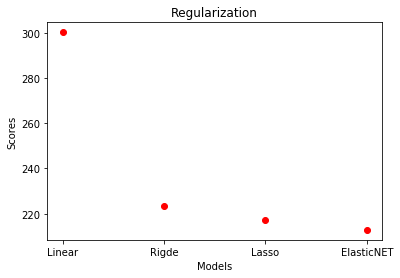

In [76]:
plt.plot(models["Model"],models["Score"], 'ro');
plt.title("Regularization")
plt.xlabel("Models")
plt.ylabel("Scores")
plt.show()